 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# whale_returns.describe()
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
print(whale_returns.isnull().sum())
#print(whale_returns[whale_returns.isnull().any(axis = 1)])


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [6]:
# Count nulls
algo_returns.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_price_df = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_price_df = sp500_price_df.sort_values('Date',ascending=True)
sp500_price_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_price_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_price_df["Close"]= sp500_price_df["Close"].str.replace('$','').astype("float")
sp500_price_df.sort_index(inplace = True)
sp500_price_df


C:\Users\itsme\anaconda\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [11]:
# Calculate Daily Returns
sp500_returns_df = sp500_price_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_returns_df = sp500_returns_df.dropna()
sp500_returns_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_df.columns = ['S&P 500']
sp500_returns_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, sp500_returns_df], axis="columns", join="inner")
combined_df.dropna(inplace = True)
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

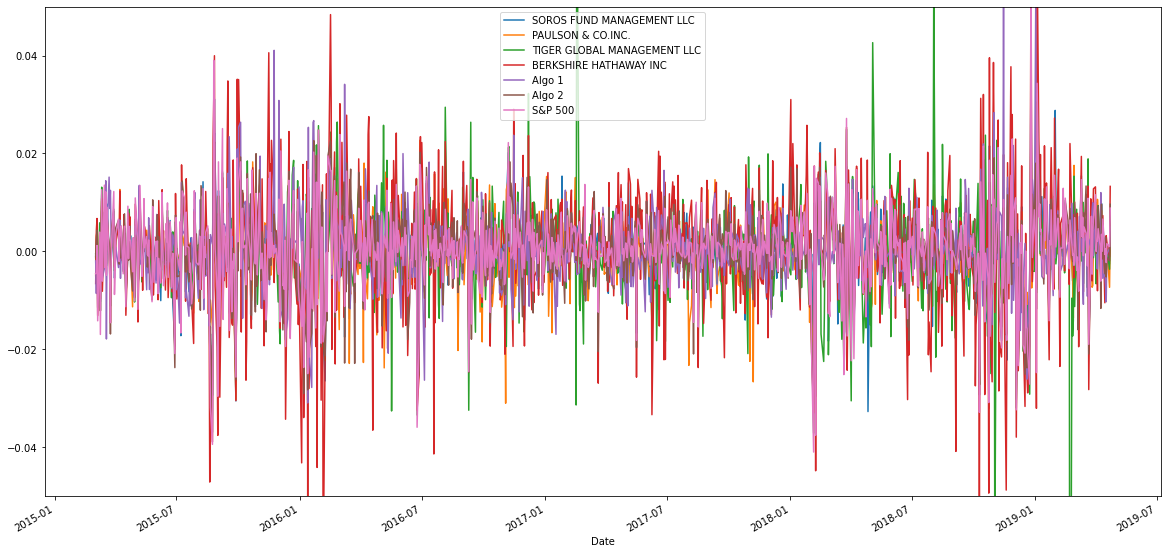

In [15]:
# Plot daily returns of all portfolios
combined_df.plot(ylim=[-.05,.05],figsize=(20,10));


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

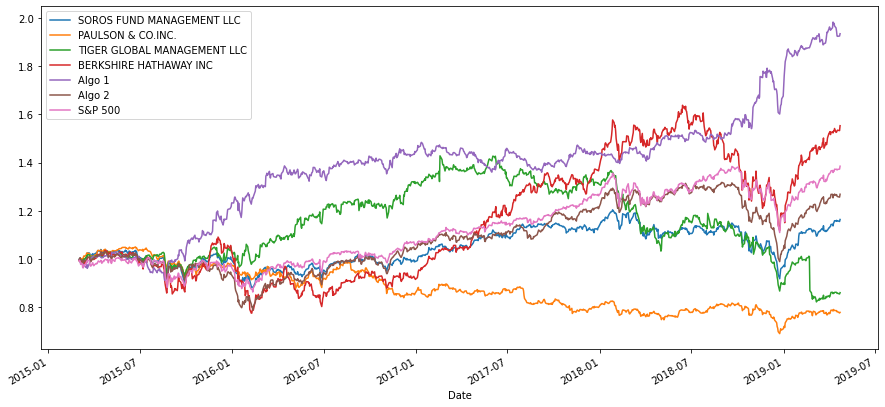

In [16]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
new_cumulative_returns_df = (1 + combined_df).cumprod()
new_cumulative_returns_df.plot(figsize=(15,7))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

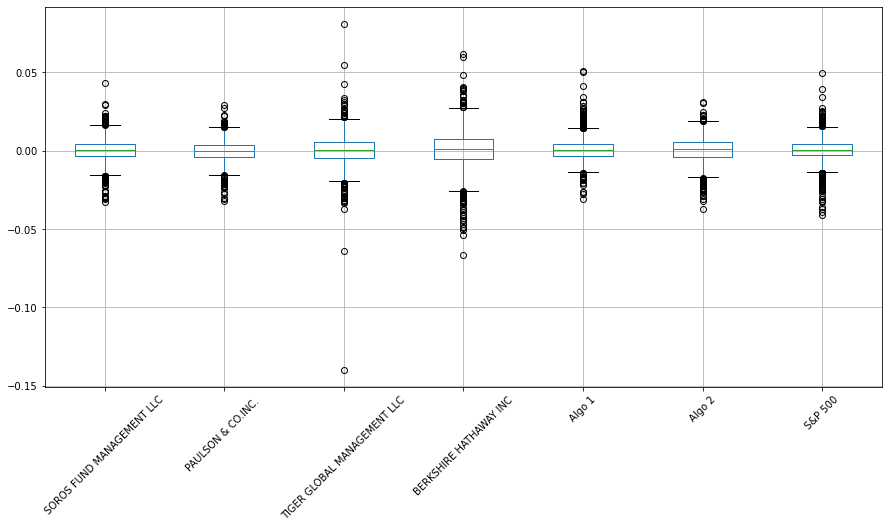

In [17]:
# Box plot to visually show risk
combined_df.boxplot(rot=45,figsize=(15,7))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
combined_df.std().sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
combined_df.std() > combined_df['S&P 500'].std()


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
combined_df.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

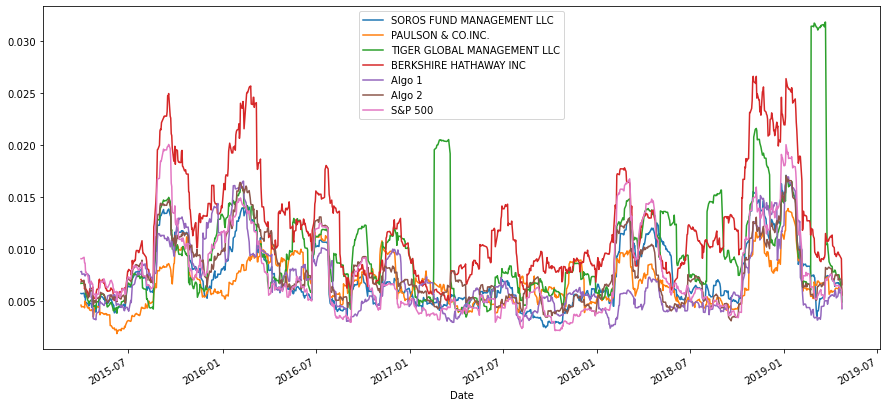

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(15,7))


### Calculate and plot the correlation

In [22]:
# Calculate the correlation

# Display de correlation matrix
combined_df.corr()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

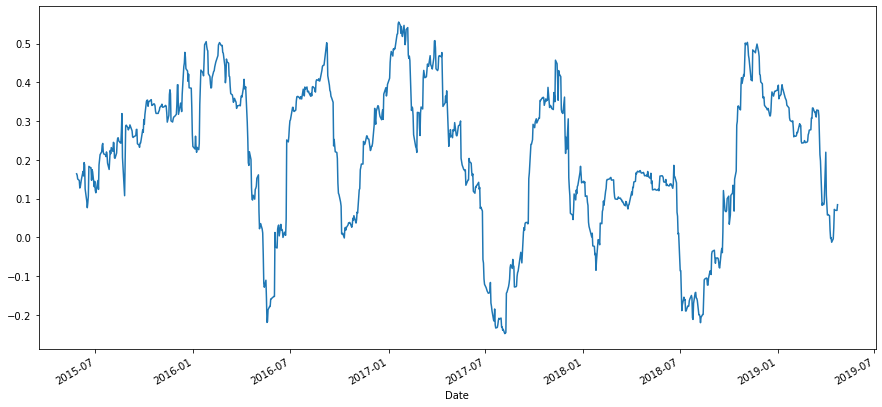

In [23]:
# Calculate covariance of a single portfolio
#This I have tried mulitple times and when changing it makes other things now work.. This section will need to be changed with guidance
# Calculate variance of S&P 500

# Computing beta

# Plot beta trend
rolling_covariance_algo1 = combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&P 500'])
rolling_variance_sp500 = combined_df['S&P 500'].rolling(window=60).var()
rolling_beta_algo1 = rolling_covariance_algo1/rolling_variance_sp500
rolling_beta_algo1.plot(figsize=(15,7))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

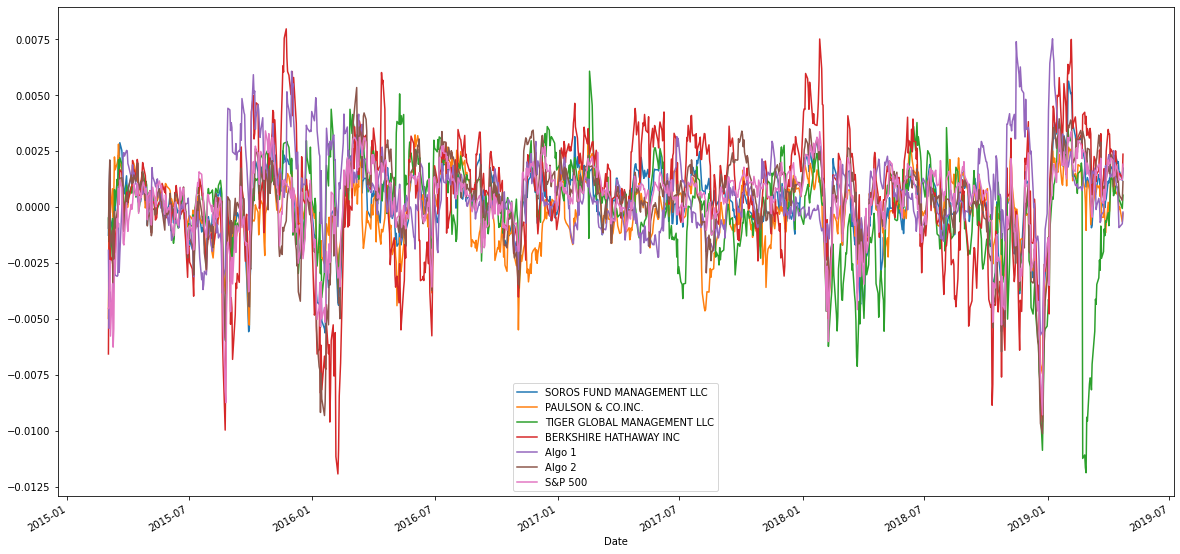

In [24]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(span=21, axis="index").mean().plot(figsize=(20,10));

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean()*252) / (combined_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Combined Data Sharpe Ratios'}>

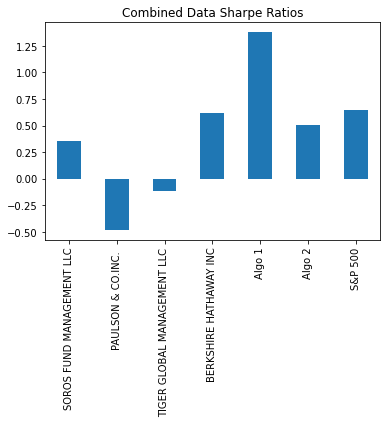

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title= "Combined Data Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
<i>Algo 1 strategy outperforms everything, but Algo 2 strategy does not outperform with the <b>S & P 500</b> and the <b>Berkshire Hathaway</b>.  

It dose beat <b>Paulson, <b>Soros</b> and <b>Tiger Global Management</b>. </i> 


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
#   Tesla - Elon to compare started companies
TSLA_df = pd.read_csv(Path("Resources\TSLA_google_fiance - Sheet2.csv"),index_col="Date",parse_dates = True, infer_datetime_format = True)
TSLA_df.rename(columns={"Close":"TSLA"}, inplace = True)
TSLA_df.head()

,TSLA
Date,
2021-01-04,729.77
2021-01-05,735.11
2021-01-06,755.98
2021-01-07,816.04
2021-01-08,880.02


In [28]:
# Reading data from 2nd stock
# Pay Pal
PYPL_df = pd.read_csv(Path("Resources\PYPL_google_finance - Sheet2.csv"),index_col="Date",parse_dates = True, infer_datetime_format = True)
PYPL_df.rename(columns={"Close":"PayPal "}, inplace = True)
PYPL_df.head()

,PayPal
Date,
2021-01-04,231.92
2021-01-05,234.91
2021-01-06,226.83
2021-01-07,235.04
2021-01-08,242.46


In [29]:
# Reading data from 3rd stock
# SoFi Technologies - to compare to PayPal
SoFi_df = pd.read_csv(Path("Resources\SOFI_google_finance - Sheet2.csv"),index_col="Date",parse_dates = True, infer_datetime_format = True)
SoFi_df.rename(columns={"Close":"SoFi"}, inplace = True)
SoFi_df.head()

,SoFi
Date,
2021-01-04,12.20
2021-01-05,12.15
2021-01-06,12.12
2021-01-07,19.14
2021-01-08,18.74


In [30]:
# Combine all stocks in a single DataFrame
# Tesla vs PayPal vs SoFi
all_stocks = pd.concat((TSLA_df,PYPL_df,SoFi_df),axis = 1, join = "inner")
all_stocks.sort_index(ascending = True, inplace = True)
all_stocks.head() 


,TSLA,PayPal,SoFi
Date,,,
2021-01-04,729.77,231.92,12.20
2021-01-05,735.11,234.91,12.15
2021-01-06,755.98,226.83,12.12
2021-01-07,816.04,235.04,19.14
2021-01-08,880.02,242.46,18.74


In [31]:
# Reset Date index
all_stocks.index = all_stocks.index.normalize()

In [32]:
# Reorganize portfolio data by having a column per symbol
portfolio_returns = all_stocks.pct_change()
# Drop NAs
portfolio_returns.dropna(inplace = True)
# Display sample data
portfolio_returns.head()

,TSLA,PayPal,SoFi
Date,,,
2021-01-05,0.007317,0.012892,-0.004098
2021-01-06,0.028390,-0.034396,-0.002469
2021-01-07,0.079447,0.036195,0.579208
2021-01-08,0.078403,0.031569,-0.020899
2021-01-11,-0.078214,-0.020457,0.013340


In [33]:
# Calculate daily returns
portfolio_returns = all_stocks.pct_change()
# Drop NAs
portfolio_returns.dropna(inplace = True)

# Display sample data
portfolio_returns.head()

,TSLA,PayPal,SoFi
Date,,,
2021-01-05,0.007317,0.012892,-0.004098
2021-01-06,0.028390,-0.034396,-0.002469
2021-01-07,0.079447,0.036195,0.579208
2021-01-08,0.078403,0.031569,-0.020899
2021-01-11,-0.078214,-0.020457,0.013340


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

Date
2021-09-21    0.017413
dtype: float64

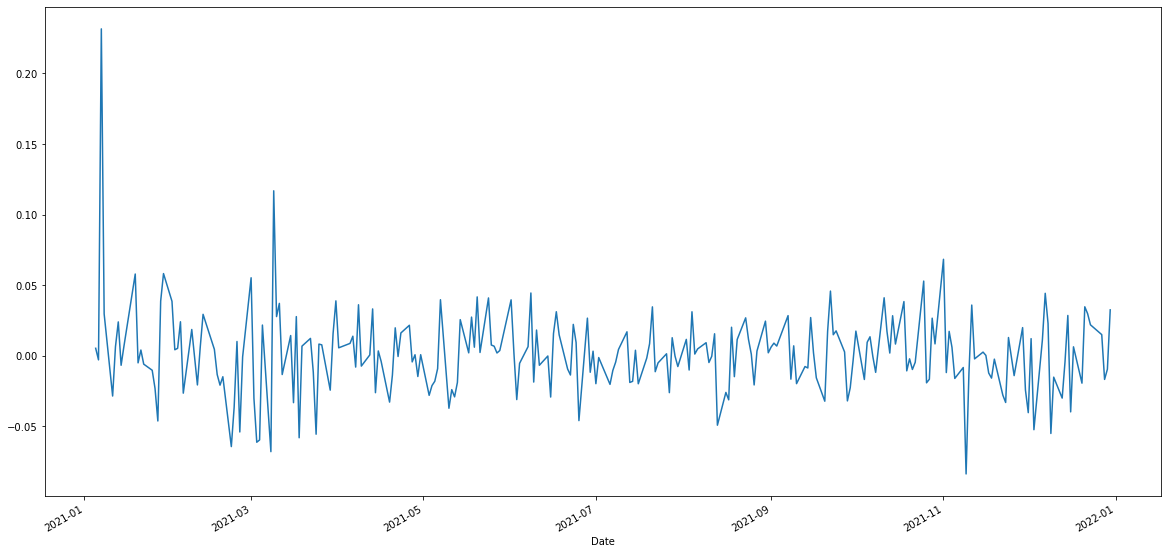

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]


# Calculate portfolio return
portfolio_returns = portfolio_returns.dot(weights)

# Display sample data
portfolio_returns.plot(figsize=(20, 10));
portfolio_returns.sample()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
combined_df = pd.concat((combined_df,portfolio_returns), axis = "columns", join = "inner")
combined_df.rename(columns = {0:"Tesla + PayPal + SoFi"},inplace = True)
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.dropna(inplace = True)
combined_df.head(10)
#this will need to be reviewed due to did 3 add'l stocks for 2021

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Tesla + PayPal + SoFi
Date,,,,,,,,


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
joined_portfolio_returns_annual_std = (joined_portfolio_returns.std())*np.sqrt(252)
joined_portfolio_returns_annual_std.sort_values(ascending = False)# #

NameError: name 'joined_portfolio_returns' is not defined

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

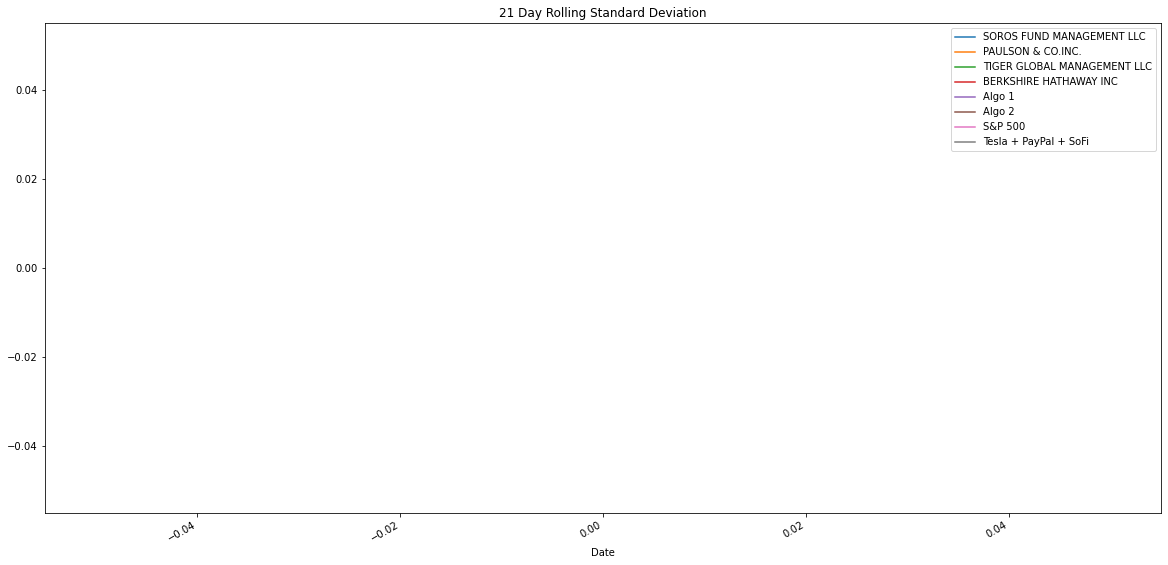

In [ ]:
# Calculate rolling standard deviation
joined_portfolio_roll_std = joined_portfolio_returns.rolling(window = 21).std()
# Plot rolling standard deviation
joined_portfolio_roll_std. plot(title = "21 Day Rolling Standard Deviation", figsize=(20,10))
# there needs to be redone - re-did and re-did for too long - only thing without error 

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation
# re-did mulitiple times
joined_portfolio_corr = combined_df.corr()
joined_portfolio_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,TSLA + PYPL + SoFi,Tesla + PayPal + SoFi
SOROS FUND MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAULSON & CO.INC.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIGER GLOBAL MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BERKSHIRE HATHAWAY INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S&P 500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TSLA + PYPL + SoFi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tesla + PayPal + SoFi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

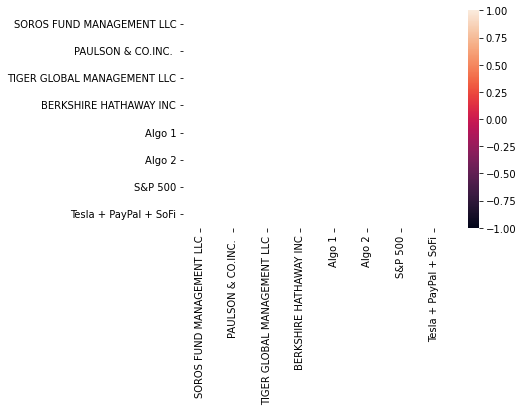

In [ ]:
# Calculate and plot Beta
sns.heatmap(joined_portfolio_corr, vmin = -1, vmax=1, annot = True)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
combined_df_sharpe_ratios_final = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
combined_df_sharpe_ratios_final
# Plot beta trend
# tried multiple does got make #s & not dup  


SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
Algo 1                        NaN
Algo 2                        NaN
S&P 500                       NaN
TSLA + PYPL + SoFi            NaN
Tesla + PayPal + SoFi         NaN
dtype: float64

<AxesSubplot:title={'center':'Combined Data Sharpe Ratios'}>

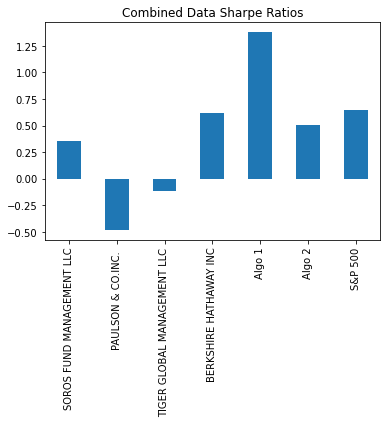

In [ ]:
# Visualize the sharpe ratios as a bar plot


sharpe_ratios.plot(kind = 'bar', title = "Combined Data Sharpe Ratios")


#combined_df.plot(kind="bar", title = "Portfolio (Tesla, PayPal, SoFi with Combined Ratios) Sharpe Ratios")
# Tried this and will not plot right will need to rework after spending hours on :)

### How does your portfolio do?

Write your answer here!

In [ ]:
Highly correlated for 2021. 